# Iris Dataset

In [2]:
import pandas as pd
import kmeans as km
import matplotlib.pyplot as plt
import rbg
from PIL import Image

df = pd.read_csv('./iris.csv')

### Elbow Method
Utilizamos esto para saber la cantidad óptima de clusters que se deben utilizar.

Text(0.5, 1.0, 'Elbow Method')

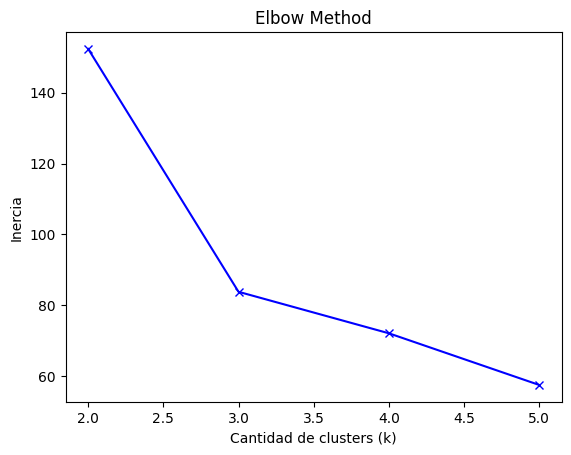

In [63]:

df_copy = df.copy()
df_copy.drop(['species'], axis=1, inplace=True)

k = [2, 3, 4, 5]
valores_de_inercia = []
for i in k:
    kmeans_iris = km.Kmeans(df_copy, i, 0.001)
    clusters_iris = kmeans_iris.clustering(1000)
    valores_de_inercia.append(kmeans_iris.get_inertia(clusters_iris))

plt.plot(k, valores_de_inercia, 'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method')

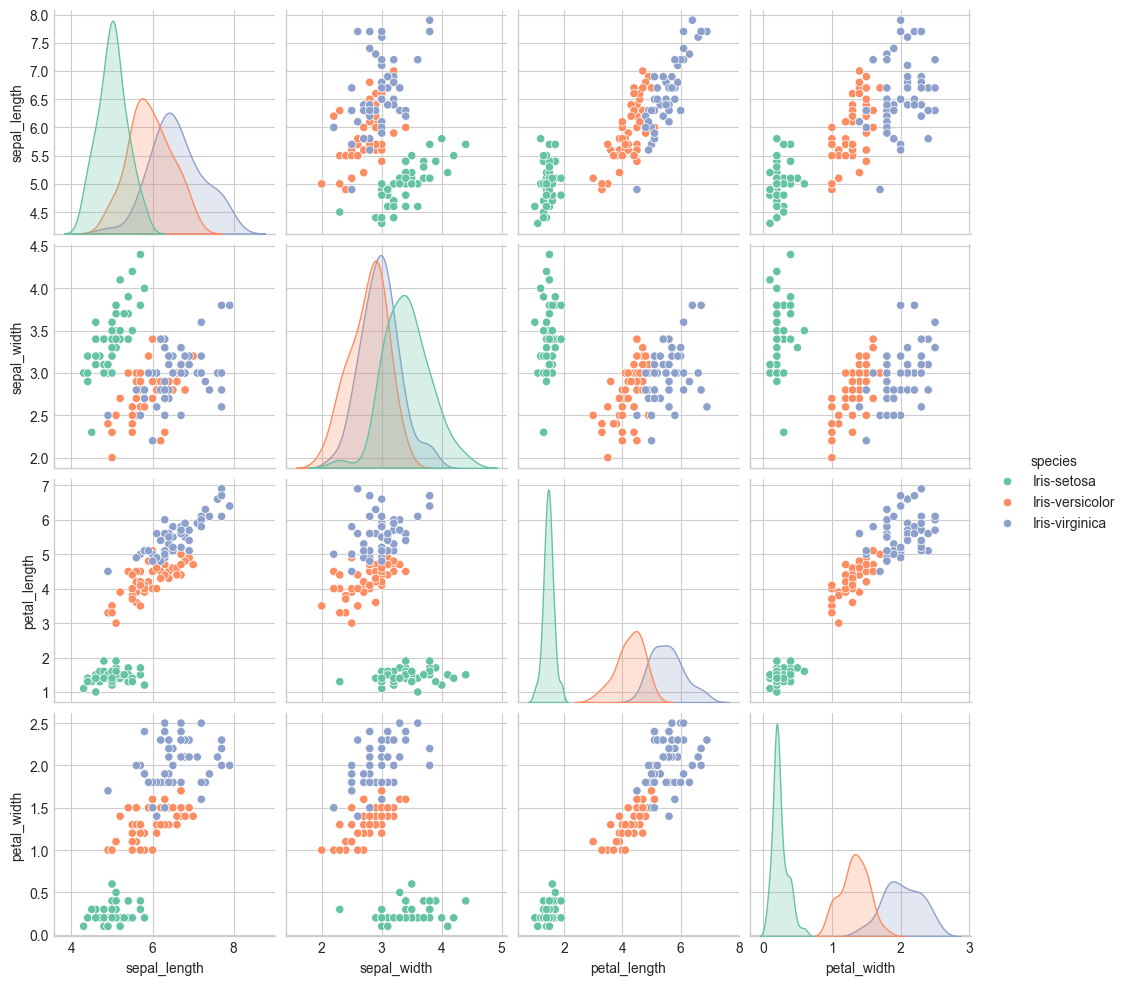

In [105]:
import seaborn as sns

df_copy = df.copy()
df_copy.drop(columns=['species'], inplace=True)

kmeans = km.Kmeans(df_copy, 5, 0.001)
kmeans.clustering(1000)

df_copy['centroids'] = kmeans.clustering(1000)

sns.pairplot(kmeans.data, hue='centroids', palette='Set2')

plt.show()

## Segmentación de Imágenes

In [100]:
def reduce_colors(path, name, k, max_iter, convergence):
    df_img, width, height = rbg.img_to_RGB(path)
    kmeans_img = km.Kmeans(df_img, k, convergence)
    clusters_img = kmeans_img.clustering(max_iter)

    df_img_clustered = df_img.copy()
    for i in range(len(df_img_clustered)):
        centroid_values = kmeans_img.centroids[clusters_img[i]]
        df_img_clustered.at[i, 'R'] = round(centroid_values[0])
        df_img_clustered.at[i, 'G'] = round(centroid_values[1])
        df_img_clustered.at[i, 'B'] = round(centroid_values[2])

    image_array = df_img_clustered[['R', 'G', 'B']].values.reshape((width, height, 3)).astype('uint8')
    img = Image.fromarray(image_array)
    img = img.transpose(Image.Transpose.ROTATE_270)
    img.save('./img/clustered/' + name + '_k' + str(k) + '_max_iter' + str(max_iter) + '.png')

    #return img_rotated


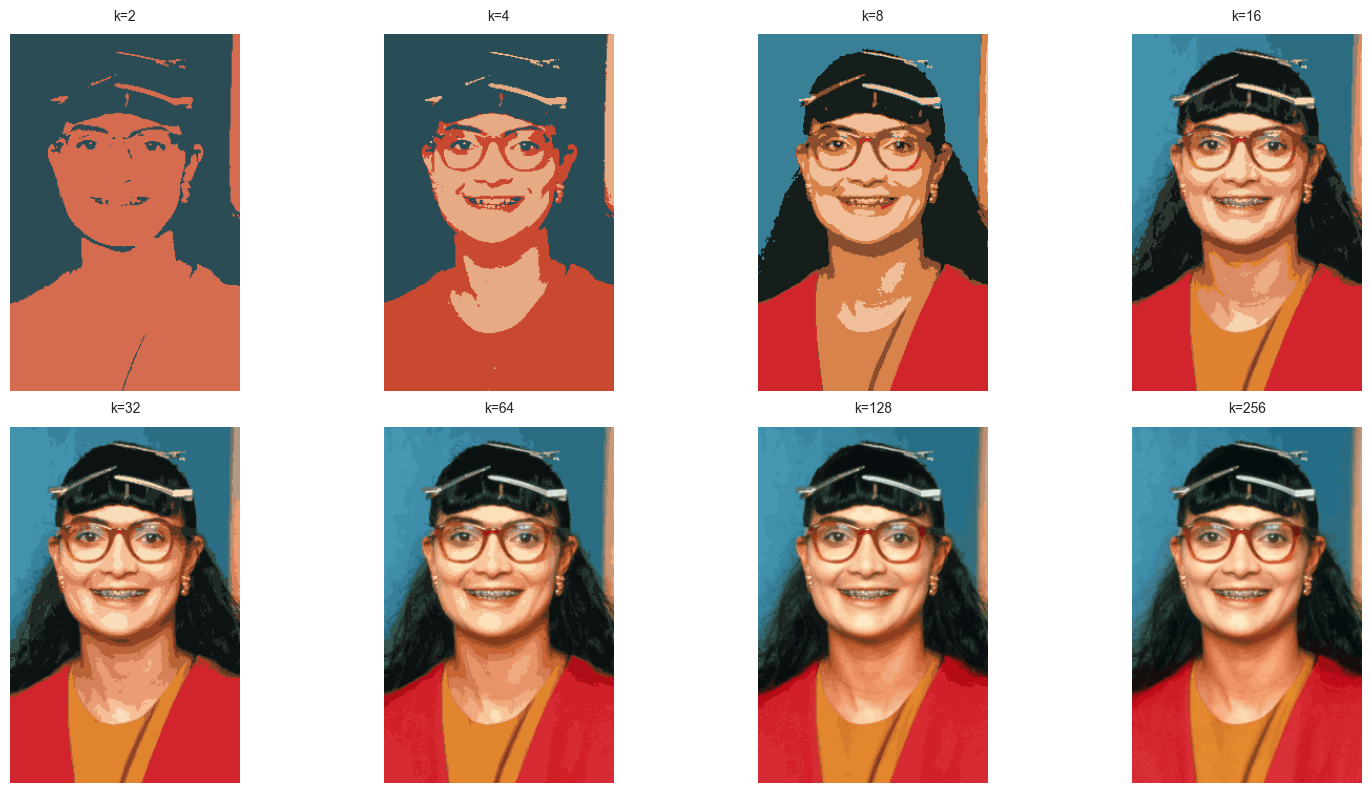

In [103]:
k = [2, 4, 8, 16, 32, 64, 128, 256]

for i in k:
    reduce_colors('./img/originals/betty.png', 'betty', i, 1000, 0.001)

filenames = ['./img/clustered/betty_k{}_max_iter1000.png'.format(i) for i in k]
num_cols = 4
num_rows = (len(filenames) + num_cols - 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

for i in range(len(filenames)):
    with open(filenames[i], 'rb') as f:
        image = Image.open(f)
        row_index = i // num_cols
        col_index = i % num_cols

        if num_rows == 1:
            ax[col_index].imshow(image)
            ax[col_index].text(0.5, 1.05, f'k={k[i]}', ha='center', va='center', transform=ax[col_index].transAxes)
            ax[col_index].axis('off')
        else:
            ax[row_index, col_index].imshow(image)
            ax[row_index, col_index].text(0.5, 1.05, f'k={k[i]}', ha='center', va='center', transform=ax[row_index, col_index].transAxes)
            ax[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()